In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix

In [38]:
insurance_data = pd.read_csv('/content/insurance.csv')
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# ***EDA***

In [39]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [40]:
insurance_data.duplicated().sum()

1

In [41]:
insurance_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [42]:
insurance_data.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [43]:
insurance_data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [44]:
insurance_data.shape

(1338, 7)

In [45]:
insurance_data.rename(columns ={'sex': 'gender'},inplace = True)

In [46]:
insurance_data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [47]:
insurance_data['gender'].unique()

array(['female', 'male'], dtype=object)

In [48]:
insurance_data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [49]:
smoker = {'yes':1, 'no':0}
insurance_data['smoker']= insurance_data['smoker'].map(smoker)

In [50]:
gender = {'male':1, 'female':0}
insurance_data['gender']= insurance_data['gender'].map(gender)

In [51]:
le = LabelEncoder()
insurance_data['region'] = le.fit_transform(insurance_data['region'])

In [52]:
insurance_data

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [53]:
insurance_data.describe()

,age,gender,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [54]:
insurance_data.corr()

,age,gender,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
gender,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


# ***Feature Engineering***

In [55]:
# prompt: create a feature engineering

# Assuming 'charges' is the target variable, create a new feature 'bmi_smoker'
insurance_data['bmi_smoker'] = insurance_data['bmi'] * insurance_data['smoker']


# ***Data Visualization***

<Axes: >

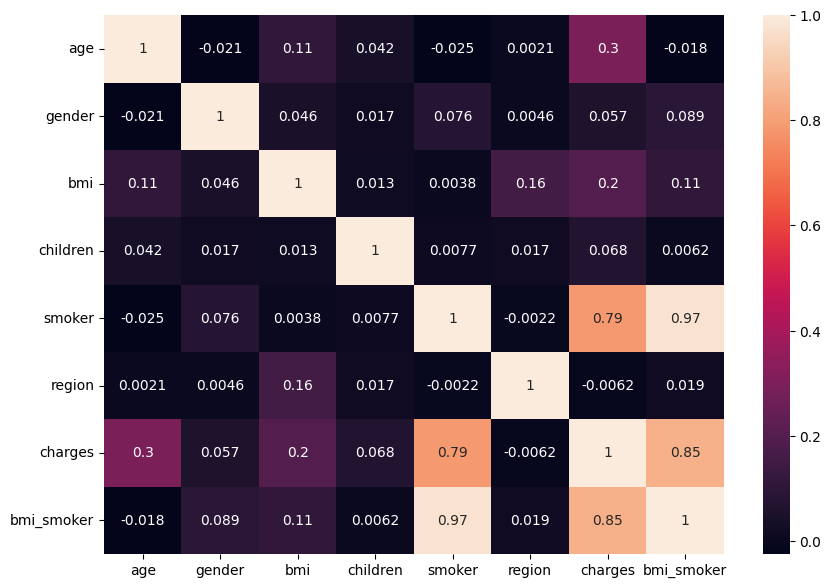

In [56]:
plt.figure(figsize=(10,7))
sns.heatmap(insurance_data.corr(), annot=True)

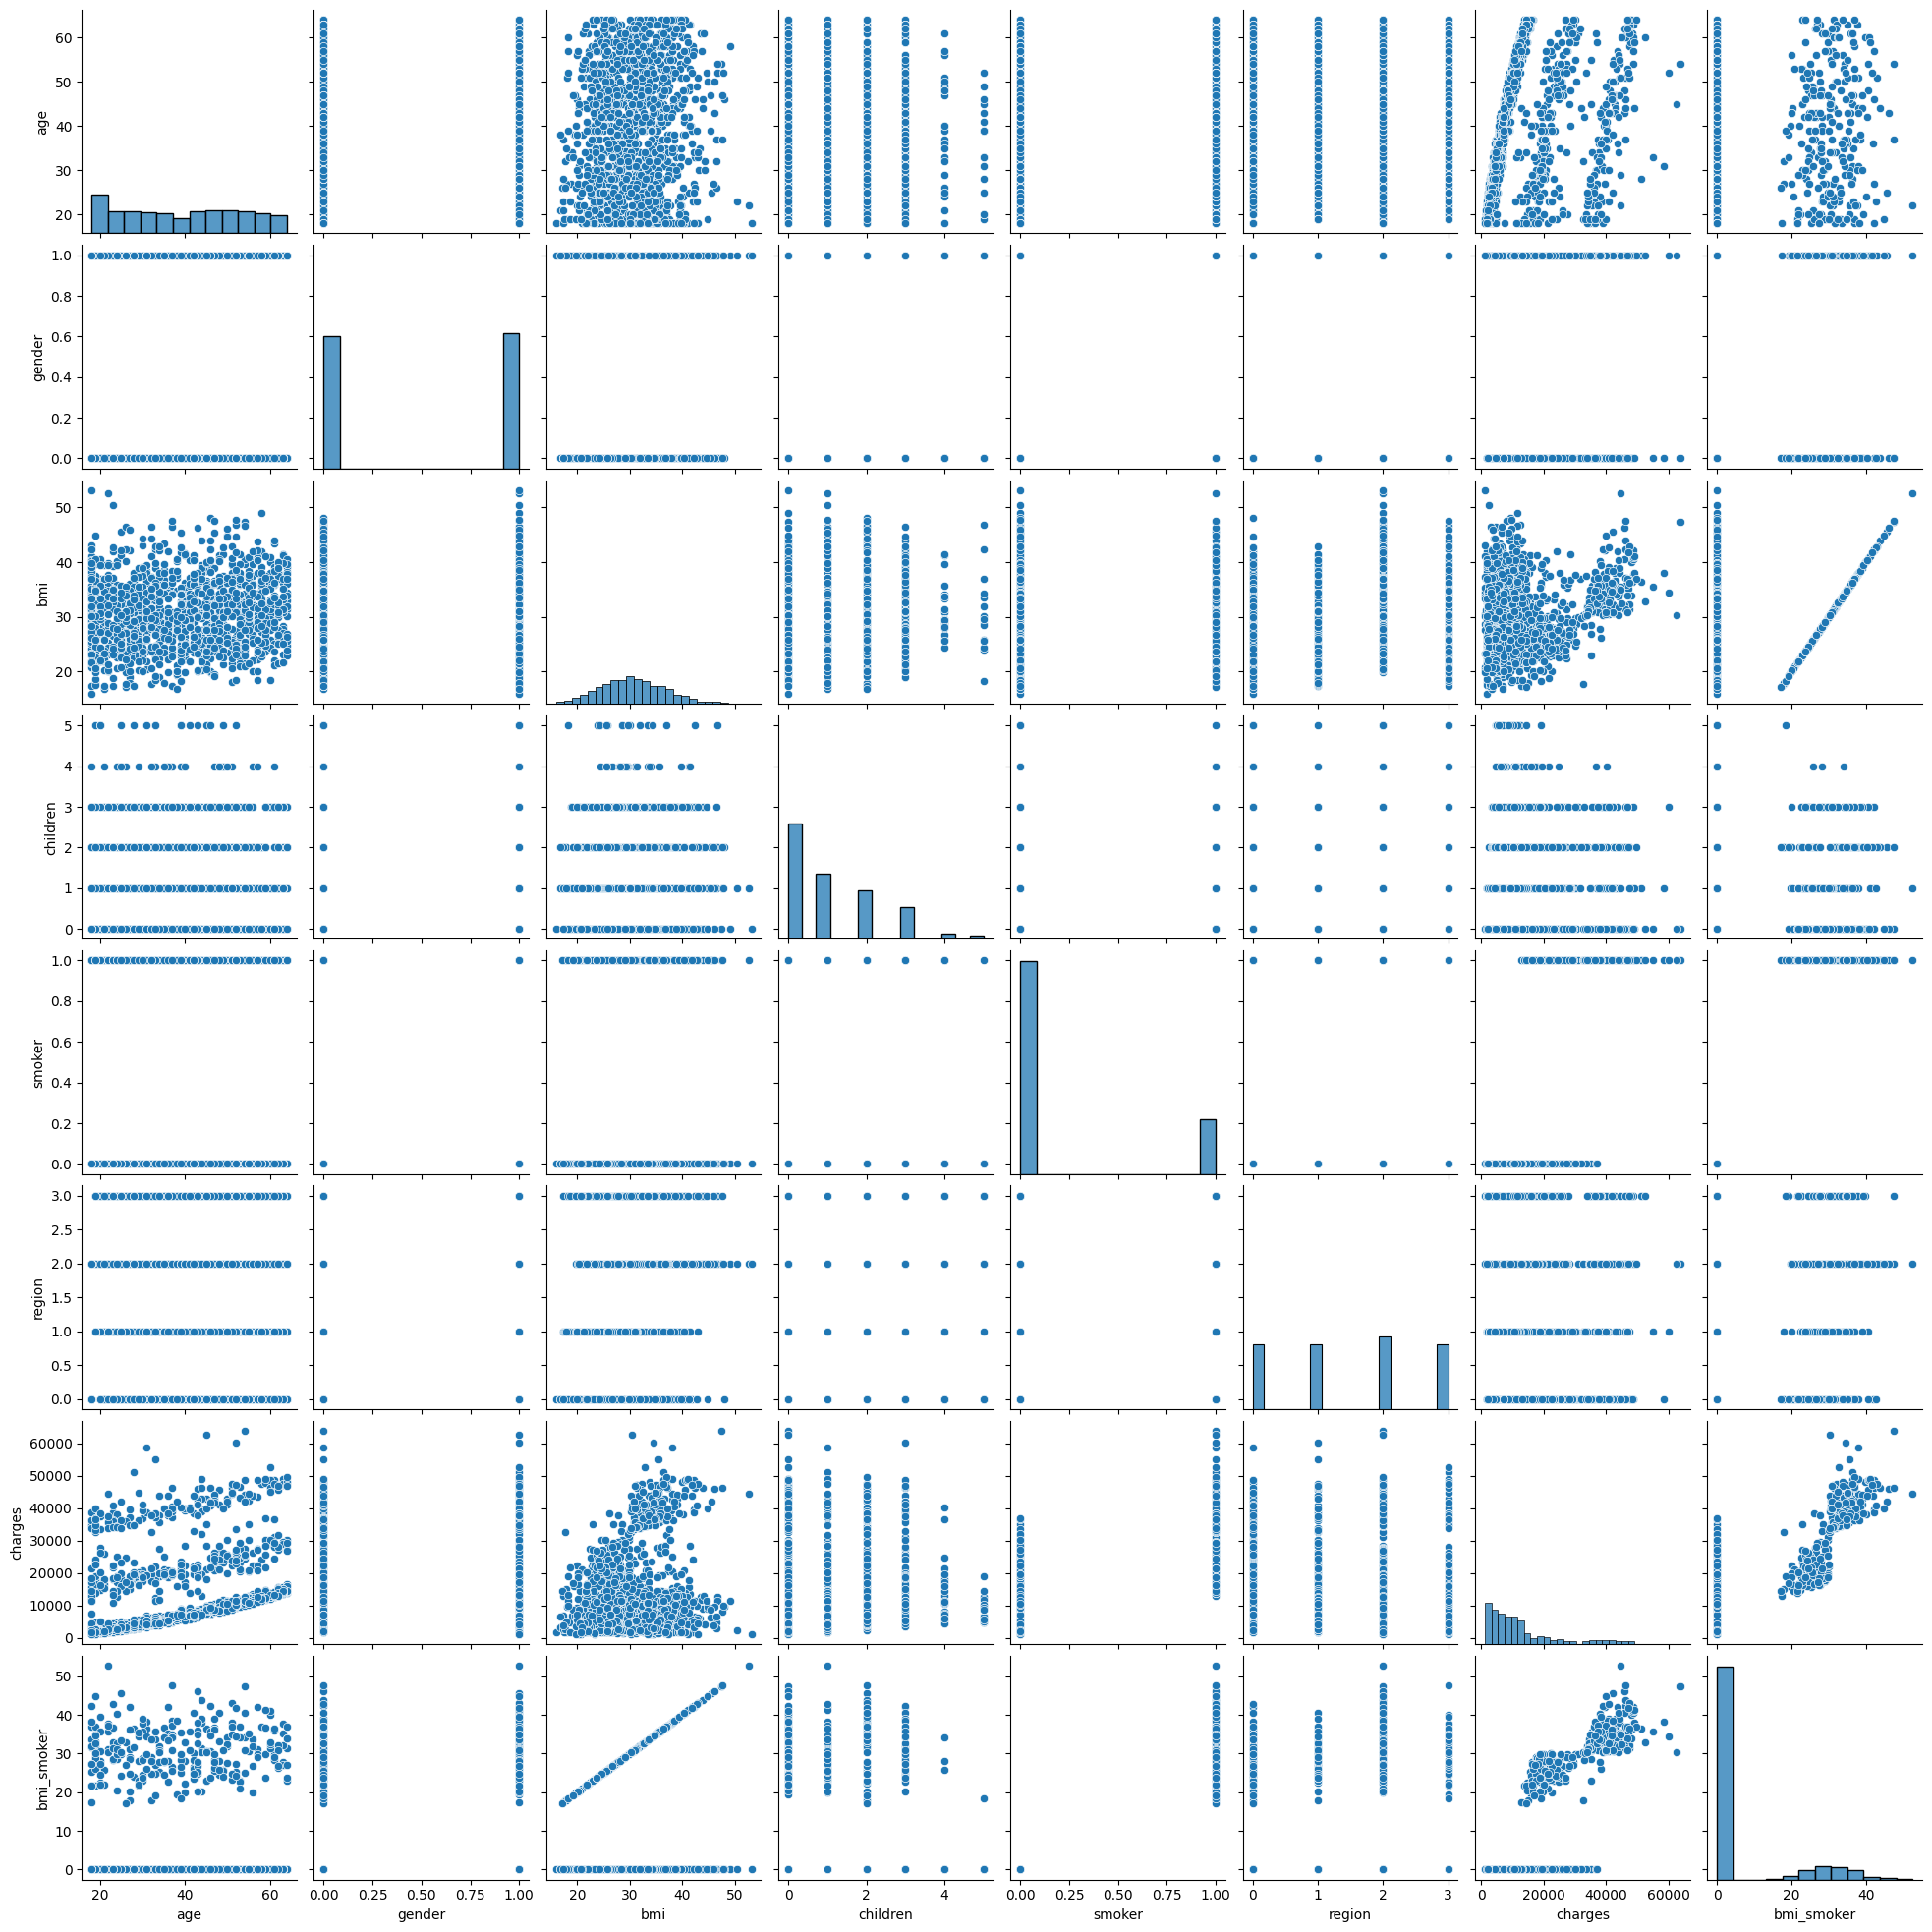

In [57]:
sns.pairplot(insurance_data)

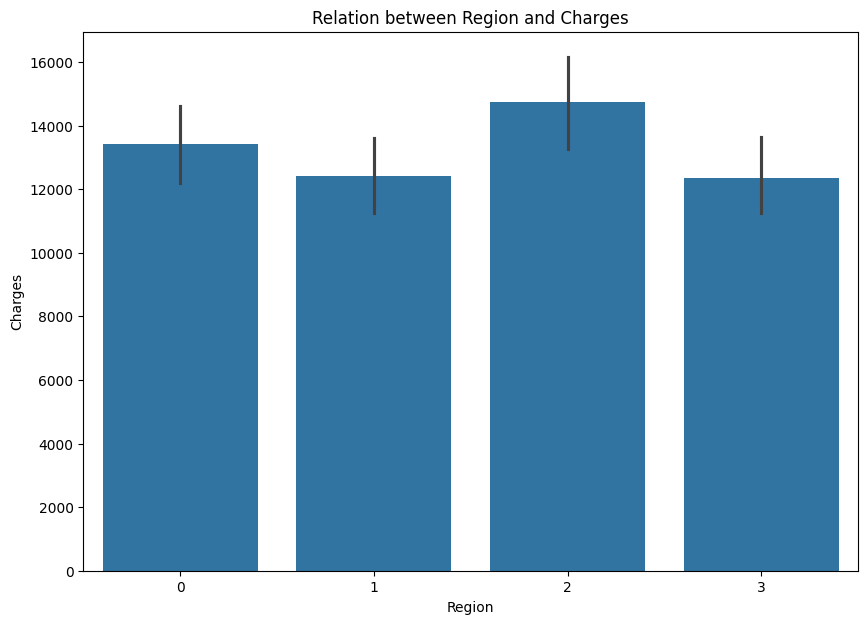

In [58]:
plt.figure(figsize=(10,7))
sns.barplot(x='region', y='charges', data=insurance_data)
plt.title('Relation between Region and Charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


# ***Splitting Data***

In [59]:
insurance_data

,age,gender,bmi,children,smoker,region,charges,bmi_smoker
0,19,0,27.900,0,1,3,16884.92400,27.90
1,18,1,33.770,1,0,2,1725.55230,0.00
2,28,1,33.000,3,0,2,4449.46200,0.00
3,33,1,22.705,0,0,1,21984.47061,0.00
4,32,1,28.880,0,0,1,3866.85520,0.00
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0.00
1334,18,0,31.920,0,0,0,2205.98080,0.00
1335,18,0,36.850,0,0,2,1629.83350,0.00
1336,21,0,25.800,0,0,3,2007.94500,0.00


In [60]:
x = insurance_data.iloc[: , :6]
x

,age,gender,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [61]:
y = insurance_data.iloc[: , 6:7]
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =20, random_state = 2)

In [63]:
tree = DecisionTreeRegressor(max_depth=2, min_samples_split =3, min_samples_leaf=3, random_state = 0)
tree.fit(x_train, y_train)


DecisionTreeRegressor(max_depth=2, min_samples_leaf=3, min_samples_split=3,
                      random_state=0)

In [64]:
tree.score(x_train, y_train)

0.8280686524666134

In [65]:
tree.score(x_test, y_test)

0.6122346125896398